# <font color='blue'>Decisão de negócio: web ou app</font>

In [1]:
# Versão da linguagem Python
from platform import python_version
print('Versão da linguagem Python usada neste Jupyter Notebook:', python_version())

Versão da linguagem Python usada neste Jupyter Notebook: 3.9.12


In [2]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, explained_variance_score
sns.set_style('whitegrid')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

In [3]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Pedro Leonardo" --iversions

Author: Pedro Leonardo

sklearn   : 1.1.1
seaborn   : 0.11.2
pandas    : 1.4.2
matplotlib: 3.5.2
numpy     : 1.22.4



# Carregando o Conjunto de Dados

In [4]:
# Carregar o dataset
dados = pd.read_csv('dados/dataset.csv')

In [5]:
# Shape
dados.shape

(500, 5)

In [6]:
# Info
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


In [7]:
# Amostra
dados.sample(10)

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
54,4.648199,33.541231,12.783892,36.430650,619.895640
282,2.471751,32.922611,11.568116,36.909378,398.163469
491,4.301996,33.811733,11.186809,36.298893,535.321610
99,5.137817,33.769812,11.304462,37.833972,593.156402
444,4.137000,33.454302,11.016756,37.637311,511.038786
434,2.399080,32.865301,12.074830,35.569170,411.186964
373,3.689917,32.274594,12.954811,37.108816,533.040060
5,2.320550,33.503810,11.233415,37.211153,397.420584
428,5.405406,33.172331,13.078692,37.329819,663.074818
284,2.436959,34.050947,11.388645,39.081565,451.628610


  # Análise Exploratória de Dados

In [8]:
# Colunas
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [9]:
# Correlação - tabela
dados.corr()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.060247,0.029143,-0.047582,0.809084
numero_medio_cliques_por_sessao,0.060247,1.000000,-0.027826,-0.034987,0.355088
tempo_total_logado_app,0.029143,-0.027826,1.000000,0.082388,0.499328
tempo_total_logado_website,-0.047582,-0.034987,0.082388,1.000000,-0.002641
valor_total_gasto,0.809084,0.355088,0.499328,-0.002641,1.000000


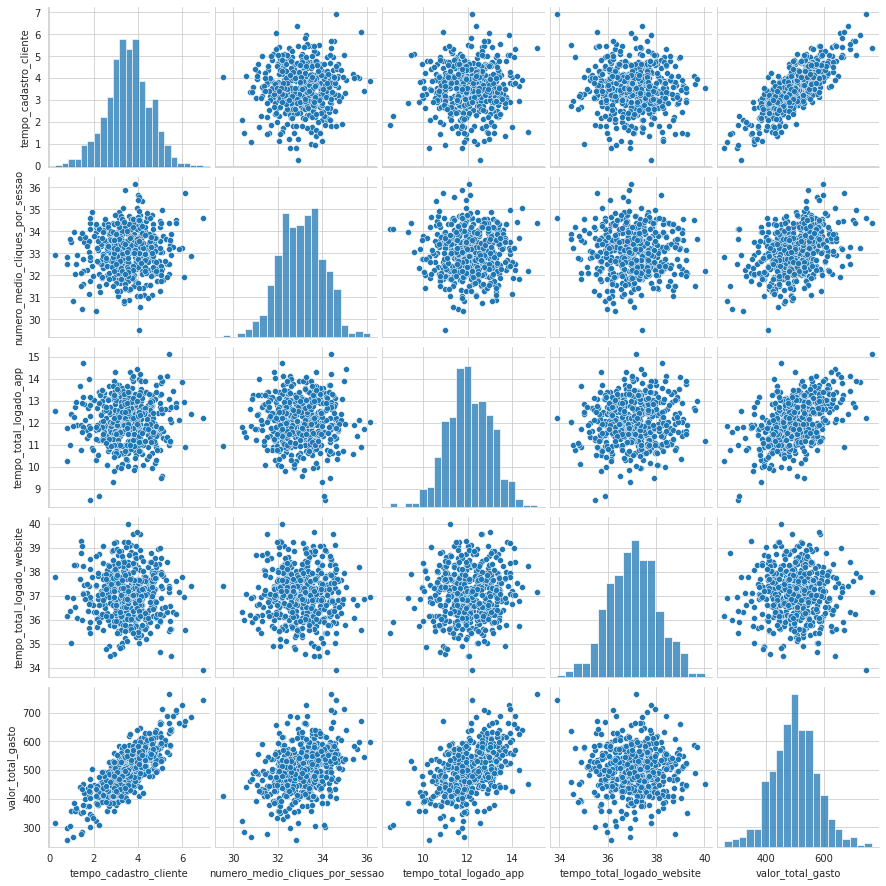

In [10]:
# Correlação - visual
sns.pairplot(dados)

## Análise 1 - Relação Entre Tempo no web site e Valor Gasto

<Figure size 1296x1584 with 0 Axes>

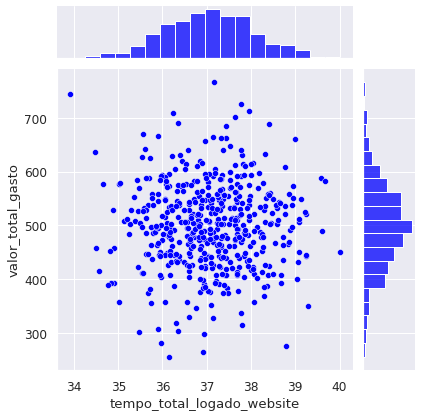

In [11]:
# Plot
plt.figure(figsize = (18, 22))
sns.set(font_scale = 1.1)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_website',
              y = 'valor_total_gasto',
              color = "blue");

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos (seguem uma distribuição normal).

Observando o gráfico de dispersão, não parece haver correlação entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [12]:
# Correlação
dados[['tempo_total_logado_website', 'valor_total_gasto']].corr()

,tempo_total_logado_website,valor_total_gasto
tempo_total_logado_website,1.000000,-0.002641
valor_total_gasto,-0.002641,1.000000


## Análise 2 - Relação Entre Tempo na App e Valor Gasto

In [13]:
# Columns
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<Figure size 1296x864 with 0 Axes>

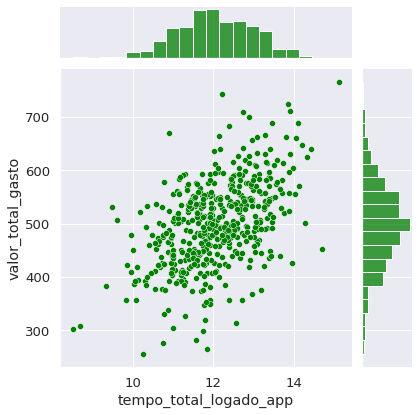

In [14]:
# Plot 
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_app',
              y = 'valor_total_gasto',
              color = 'green');

Observando os histogramas, podemos ver que os dados estão normalmente distribuídos.

Observando o gráfico de dispersão, parece haver correlação positiva entre as duas variáveis. Vamos confirmar calculando o coeficiente de correlação entre elas.

In [15]:
# Correlação
dados[['tempo_total_logado_app', 'valor_total_gasto']].corr()

,tempo_total_logado_app,valor_total_gasto
tempo_total_logado_app,1.000000,0.499328
valor_total_gasto,0.499328,1.000000


Os dados tem uma correlação positiva moderada. Podemos deduzir que o valor total gasto mensalmente tende a aumentar se o cliente passar mais tempo logado na app.

## Análise 3 - Relação Entre Tempo na App e Tempo de Cadastro

In [16]:
# Columns
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


<Figure size 1296x864 with 0 Axes>

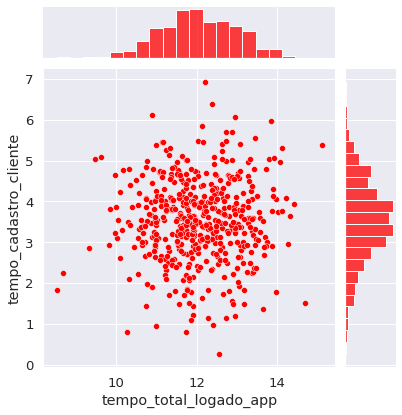

In [17]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_app',
              y = 'tempo_cadastro_cliente',
              color = 'red')

Observando os histogramas pode-se ver que os dados estão normalmente distribuídos.

A partir do gráfico de dispersão podemos ver que os dados são muito densos no meio do gráfico, não havendo uma correlação clara. Pode-se deduzir que existem muitos clientes que são membros há 3-4 anos e gastam aproximadamente 11,5 a 12,5 minutos no app

## Análise 4 - Relação Entre Tempo de Cadastro e Valor Gasto

In [18]:
# Columns
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   tempo_cadastro_cliente           500 non-null    float64
 1   numero_medio_cliques_por_sessao  500 non-null    float64
 2   tempo_total_logado_app           500 non-null    float64
 3   tempo_total_logado_website       500 non-null    float64
 4   valor_total_gasto                500 non-null    float64
dtypes: float64(5)
memory usage: 19.7 KB


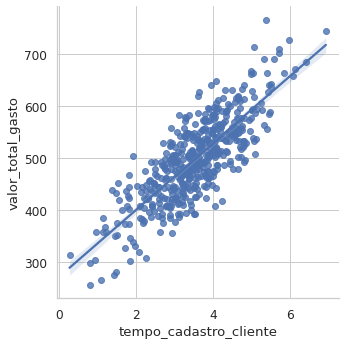

In [19]:
# Plot
sns.set(font_scale = 1.1)
sns.set_style('whitegrid')
sns.lmplot(data = dados,
           y = 'valor_total_gasto',
           x = 'tempo_cadastro_cliente')

In [20]:
# Correlação
dados[['tempo_cadastro_cliente', 'valor_total_gasto']].corr()

,tempo_cadastro_cliente,valor_total_gasto
tempo_cadastro_cliente,1.000000,0.809084
valor_total_gasto,0.809084,1.000000


A partir do lmplot e do coeficiente de correlação pode-se ver que o tempo de cadastro e o valor gasto têm uma forte correlação positiva, ou seja, à medida que o cliente se torna mais antigo, o valor total gastro por clientes também aumenta.

Outra coisa a se notar é que a sombra da linha é muito fina, o que significa que o erro entre a estimativa e os pontos de dados são relativamente pequenos

## Análise 5 - Relação Entre Tempo Logado na App e Tempo Logado no Web Site

<Figure size 1296x864 with 0 Axes>

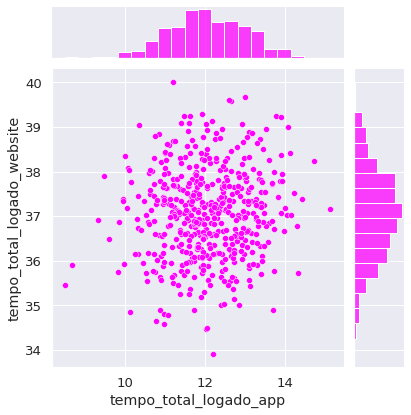

In [21]:
# Plot
plt.figure(figsize = (18, 12))
sns.set(font_scale = 1.2)
sns.jointplot(data = dados,
              x = 'tempo_total_logado_app',
              y = 'tempo_total_logado_website',
              color = 'magenta')

Não se detecta problemas críticos e podemos seguir adiante. Vamos manter a variável preditora com baixa correlação e validar essa relação com a variável alvo no modelo final.

# Pré-Processamento de Dados Para Construção de Modelos de Machine Learning

In [22]:
dados.columns

Index(['tempo_cadastro_cliente', 'numero_medio_cliques_por_sessao',
       'tempo_total_logado_app', 'tempo_total_logado_website',
       'valor_total_gasto'],
      dtype='object')

In [23]:
# Variáveis de entrada (preditoras)
X = dados[['tempo_cadastro_cliente',
           'numero_medio_cliques_por_sessao', 
           'tempo_total_logado_app',
           'tempo_total_logado_website']]

In [24]:
# Variável de saída (target)
y = dados['valor_total_gasto']

In [25]:
# Divisão em dados de treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y,test_size = 0.3, random_state = 101)

In [26]:
len(X_treino)

350

In [27]:
len(X_teste)

150

## Padronização

In [28]:
scaler = StandardScaler()

In [29]:
scaler.fit(X_treino)

StandardScaler()

In [30]:
X_treino = scaler.transform(X_treino)

In [31]:
X_teste = scaler.transform(X_teste)

In [32]:
X_treino[:5]

array([[-0.21902935, -0.23735512,  0.33914084,  0.92765292],
       [ 1.8073082 ,  0.09393489,  1.05266311,  0.2388907 ],
       [-0.00962736, -0.47064535, -0.26005737,  0.81461639],
       [-0.06171807, -0.23157636, -0.19229742, -0.26198867],
       [-2.03669802, -1.54671013, -1.27813419,  1.65800995]])

In [33]:
X_teste[:5]

array([[-0.74134552,  0.35042401,  1.32428694,  0.85663193],
       [ 0.51634261,  0.33850011,  1.36472848,  0.1071885 ],
       [ 1.22462847, -0.84278168,  1.70184401,  0.88678948],
       [ 0.48199668, -0.30436824, -0.65228214, -1.76956776],
       [ 1.88519232, -0.14493923,  0.70658414, -1.44006612]])

# Modelo 1 - Regresão Linear (benchmark)

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

![title](imagens/linear1.png)

![title](imagens/linear2.png)

![title](imagens/linear3.png)

In [34]:
# Criar o modelo
modelo_v1 = LinearRegression()

In [35]:
# Treinar o modelo
modelo_v1.fit(X_treino, y_treino)

LinearRegression()

In [36]:
print('Coeficientes: \n', modelo_v1.coef_)

Coeficientes: 
 [63.74220716 26.23901606 38.57185551  0.6847366 ]


In [37]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


## Avaliação do Modelo

In [38]:
# Previsões com dados de teste
pred_v1 = modelo_v1.predict(X_teste)

In [39]:
# Imprime as 10 primeiras previsões
pred_v1[:10]

array([513.06429807, 593.96597774, 621.6550031 , 495.82353395,
       642.08919639, 615.61800045, 592.1273355 , 493.61084354,
       457.58835597, 532.03644608])

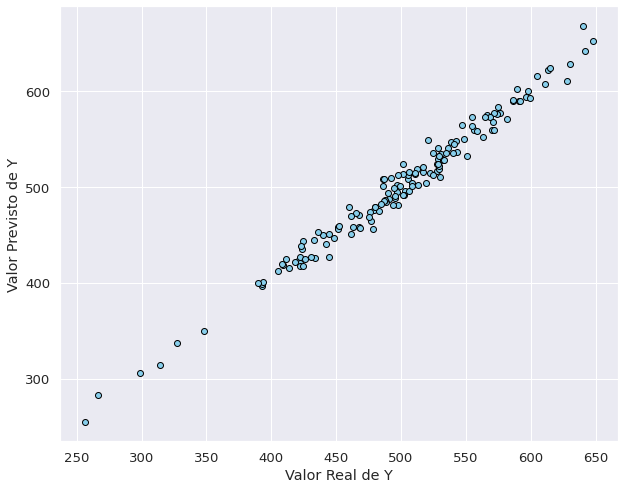

In [40]:
# Plot
plt.figure(figsize = (10, 8))
plt.scatter(x = y_teste, 
            y = pred_v1, 
            color = 'skyblue', 
            edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

A partir do gráfico de dispersão, podemos ver que há uma correlação muito forte entre os y's previstos e os y's reais nos dados do teste. Isso significa que temos um modelo muito bom.

## Métricas

In [41]:
# Valor médio gasto pelos clientes
dados['valor_total_gasto'].mean()

499.31403826079975

In [42]:
# Valor mínimo
dados['valor_total_gasto'].min()

256.6705823

In [43]:
# Valor máximo
dados['valor_total_gasto'].max()

765.5184619

In [44]:
# MAE - Erro Médio Absoluto
mean_absolute_error(y_teste, pred_v1)

7.762418645778977

> O MAE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão arradas em aproximadamente 7,76 reais, o que é um valor pequeno comparado ao valor médio gasto peor cliente.

In [45]:
# MSE - Erro quadrático médio
mean_squared_error(y_teste, pred_v1)

94.95654308438658

In [46]:
# RMSE - Raiz quadrada do erro quadrático médio
np.sqrt(mean_squared_error(y_teste, pred_v1))

9.744564797074654

O RMSE prevê que, em média, as previsões do nosso modelo (de valores gastos) estão erradas em aproximadamente 9.74, que é um valor pequeno comparadao ao valor médio gasto por cliente.

In [47]:
# Coeficiente R2 (vai de 0 a 1, e quanto maior melhor)
r2_score(y_teste, pred_v1)

0.9813622791776302

In [48]:
# Variância Explicada 
#(vai de 0 a 1, e quanto maior melhor porque significa que o modelo consegue explicar uma maior 
# variância dos dados)
explained_variance_score(y_teste, pred_v1)

0.981744918342864

O modelo é capaz de explicar 98% da variância dos dados, o que é excelente.

O coeficiente R2 de 98% e as outras métricas, demonstam que este é um modelo muito bom.

## Resíduos

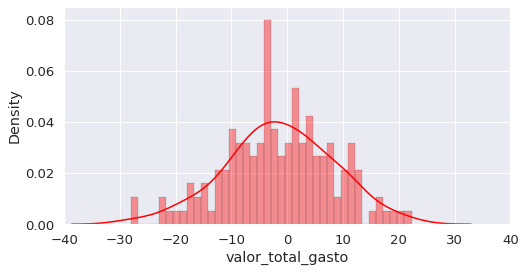

In [49]:
# Plot
plt.figure(figsize = (8, 4))
ax = sns.distplot((y_teste - pred_v1),
                  bins = 40,
                  color = 'red',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.085));

Os resíduos são aproximadamente normalmente distribuídos, o que indica um bom ajuste do modelo.

# Modelo 2 - Regressão Ridge

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

In [50]:
# Criar o modelo
modelo_v2 = Ridge(alpha = 1.0)

In [51]:
# Treinar o modelo
modelo_v2.fit(X_treino, y_treino)

Ridge()

In [52]:
print('Coeficientes: \n', modelo_v2.coef_)

Coeficientes: 
 [63.57245999 26.17198131 38.46758178  0.68013543]


In [53]:
# Coeficientes das variáveis preditoras
df_coef = pd.DataFrame(modelo_v2.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,63.572460
numero_medio_cliques_por_sessao,26.171981
tempo_total_logado_app,38.467582
tempo_total_logado_website,0.680135


In [54]:
# Previsões com dados de teste
pred_v2 = modelo_v2.predict(X_teste)
pred_v2[:10]

array([513.02461894, 593.71284026, 621.32208364, 495.83827761,
       641.71185412, 615.30802007, 591.87884788, 493.61867235,
       457.70805605, 531.9426755 ])

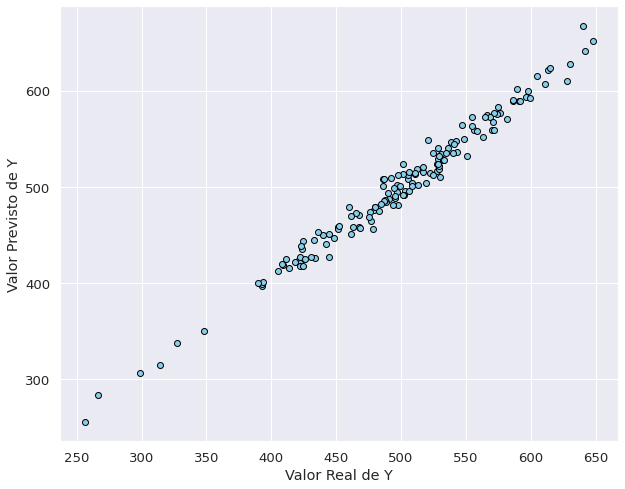

In [55]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x =y_teste, y = pred_v2, color = 'skyblue', edgecolors = 'black')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [56]:
# MAE
mean_absolute_error(y_teste, pred_v2)

7.764151148981964

In [57]:
# MSE
mean_squared_error(y_teste, pred_v2)

94.93731602493466

In [58]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v2))

9.7435781941202

In [59]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [60]:
# Variância Explicada
explained_variance_score(y_teste, pred_v2)

0.9817472659016085

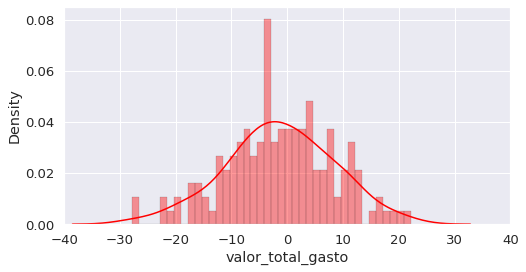

In [61]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v2),
                  bins = 40,
                  color = 'red',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.085));

# Modelo 3 - Regressão LASSO

https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

In [62]:
# Criar o modelo
modelo_v3 = Lasso(alpha = 1.0)

In [63]:
# Treinar o modelo
modelo_v3.fit(X_treino, y_treino)

Lasso()

In [64]:
print('Coeficiente: \n', modelo_v3.coef_)

Coeficiente: 
 [62.86344076 25.18747244 37.62149243  0.        ]


In [65]:
# Coeficientes
df_coef = pd.DataFrame(modelo_v3.coef_, X.columns, columns = ['Coeficiente'])
df_coef

,Coeficiente
tempo_cadastro_cliente,62.863441
numero_medio_cliques_por_sessao,25.187472
tempo_total_logado_app,37.621492
tempo_total_logado_website,0.000000


In [66]:
# Previsões com dados de teste
pred_v3 = modelo_v3.predict(X_teste)
pred_v3[:10]

array([511.50216083, 591.78590214, 619.24047552, 497.55162062,
       640.89951717, 614.42803424, 590.05764493, 494.76617949,
       459.30498489, 529.64197449])

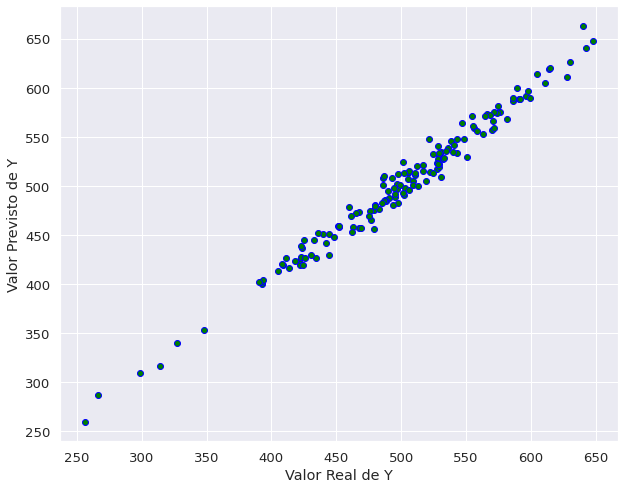

In [67]:
# Plot
plt.figure(figsize = (10,8))
plt.scatter(x = y_teste, y = pred_v3, color = 'green', edgecolors = 'blue')
plt.xlabel('Valor Real de Y')
plt.ylabel('Valor Previsto de Y');

In [68]:
# MAE
mean_absolute_error(y_teste, pred_v3)

7.7885046969510645

In [69]:
# MSE
mean_squared_error(y_teste, pred_v3)

96.05606348970672

In [70]:
# RMSE
np.sqrt(mean_squared_error(y_teste, pred_v3))

9.800819531534428

In [71]:
# Coeficiente R2
r2_score(y_teste, pred_v2)

0.981366052994101

In [72]:
# Variância Explicada
explained_variance_score(y_teste, pred_v3)

0.9815600649101045

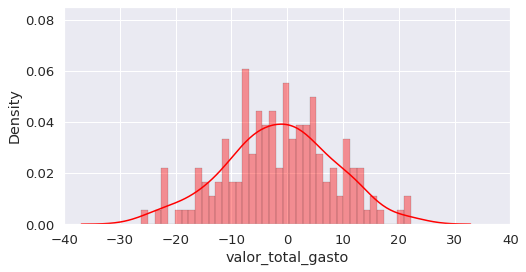

In [73]:
# Plot
plt.figure(figsize = (8,4))
ax = sns.distplot((y_teste - pred_v3),
                  bins = 40,
                  color = 'red',
                  hist_kws = dict(edgecolor = 'black', linewidth = 0.3))
ax.set(xlim = (-40, 40))
ax.set(ylim = (0, 0.085));

# Seleção do Modelo

O modelo 3 apresentou uma taxa de erro (RMSE) levemente maior e pode ser descartado. Os modelos 1 e 2 ficaram muito próximos e nesse caso devemos escolher o modelo mais simples, que em nosso exemplo é o modelo 1.

# Conclusão

In [74]:
dados.head()

,tempo_cadastro_cliente,numero_medio_cliques_por_sessao,tempo_total_logado_app,tempo_total_logado_website,valor_total_gasto
0,3.472021,33.119954,12.953263,37.034280,534.771485
1,4.198349,35.371876,10.572467,36.862183,537.915753
2,2.086348,33.976083,11.658037,37.425279,407.876378
3,3.605934,34.034164,13.592513,36.838657,618.845970
4,4.034386,32.770492,11.371767,35.261498,502.771075


In [75]:
# Coeficientes
df_coef_final = pd.DataFrame(modelo_v1.coef_, X.columns, columns = ['Coeficiente'])
df_coef_final

,Coeficiente
tempo_cadastro_cliente,63.742207
numero_medio_cliques_por_sessao,26.239016
tempo_total_logado_app,38.571856
tempo_total_logado_website,0.684737


#### Interpretações dos Coeficientes:

* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo de cadastro do cliente está associado a um aumento de R$ 63.74 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no número médio de cliques por sessão está associado a um aumento de R$ 26.24 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado na app está associado a um aumento de R$ 38.57 no valor total gasto por cliente por mês.


* Mantendo todos os outros recursos fixos, um aumento de 1 unidade no tempo total logado no web site está associado a um aumento de R$ 0.68 no valor total gasto por cliente por mês.

Podemos ver que será mais lucrativo para a empresa investir na atualização da sua app uma vez que o retorno será maior. Além disso, é importante criar políticas para reter o cliente por mais tempo, já que isso também leva ao aumento das vendas. A própria atualização da app será uma forma de reter o cliente por mais tempo.

Não compensa, neste momento, investir na atualização do web site pois o retorno será mínimo.